# Regresión polinomial

page 186

¿Qué pasa si sus datos son más complejos que una línea recta?

Sorprendentemente, puede utilizar un modelo lineal para ajustar datos no lineales.

$$ \hat{y} = \theta_{0} + \theta_{1}x + \theta_{2}x^{2} + \theta_{3}x^{3} + \cdots + \theta_{n}x^{n} $$

Si los datos no son una línea recta , entonces necesitamos atributos $x_{i}$ con $i \geq 2$. 

Una forma sencilla de hacer esto es agregar potencias de cada característica como nuevas características, luego entrenar un modelo lineal en este conjunto extendido de características.  

Ver página 110 del Clara Elena Mejía: Álgebra Lineal. 

Esta técnica se llama *Regresión polinomial*.

Veamos un ejemplo. Primero, generemos algunos datos no lineales, basados en una ecuación cuadrática simple (más algo de ruido; vea la Figura 4-12):

In [1]:
import numpy as np 

In [2]:
m = 100
x = 6 * np.random.rand(m, 1) - 3              
# una matriz de orden 100x1 con valores en el intervalo [-3,3)
y = 3 + 2*x + x**2 + np.random.randn(m, 1)

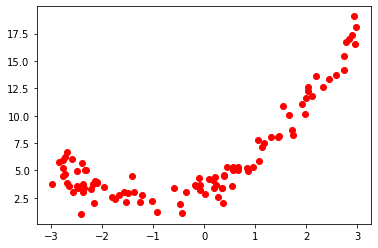

In [7]:
import matplotlib.pyplot as plt 
plt.scatter(x,y,color='red')    

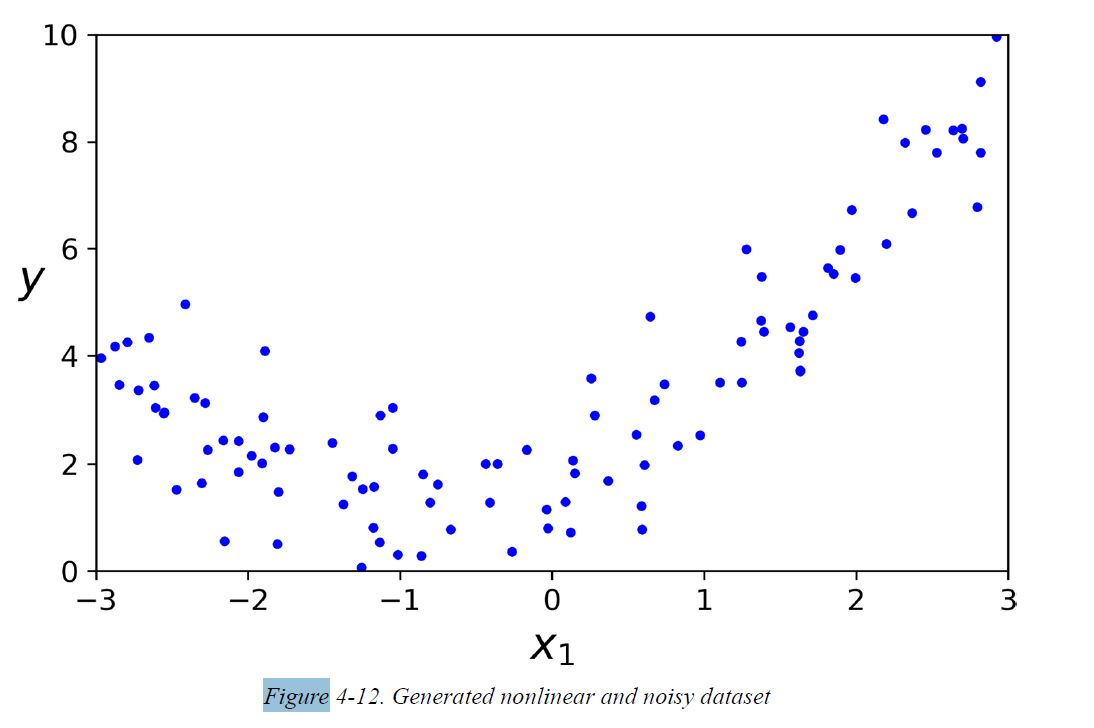

In [8]:
from IPython.display import Image 
Image('figure_4_12.JPG',width=600,height=300) 

Claramente, una línea recta nunca se ajustará correctamente a estos datos.

Así que usemos la clase ``PolynomialFeatures`` de Scikit-Learn para transformar nuestros datos de entrenamiento, agregando el cuadrado (polinomio de segundo grado) de cada característica en el conjunto de entrenamiento como una característica nueva (en este caso, solo hay una característica):

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)  
# instanciamos la clase PolinomialFeatures cuyo argumentos sean degree e include bias
X_poly = poly_features.fit_transform(x)   
# Aplicamos el método fit_transform() a la 
# lista X para crear un nuevo vector de atributos

In [16]:
x[0:10] 

array([[ 0.37362158],
       [-2.67997469],
       [ 1.74235286],
       [ 1.4691575 ],
       [ 1.44177448],
       [ 2.83664104],
       [ 2.79077674],
       [ 0.65945566],
       [ 0.45685279],
       [-1.40500491]])

In [17]:
X_poly[0:10]


array([[ 0.37362158,  0.13959309],
       [-2.67997469,  7.18226435],
       [ 1.74235286,  3.03579348],
       [ 1.4691575 ,  2.15842375],
       [ 1.44177448,  2.07871366],
       [ 2.83664104,  8.0465324 ],
       [ 2.79077674,  7.78843484],
       [ 0.65945566,  0.43488177],
       [ 0.45685279,  0.20871447],
       [-1.40500491,  1.97403879]])

``X_poly`` ahora contiene la característica original de $x$ más el cuadrado de esta característica.

Ahora puede ajustar un modelo de regresión lineal a estos datos de entrenamiento extendidos (Figura 4-13):

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() 
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.37485477]), array([[1.99683252, 0.94137672]]))

In [ ]:
(lin_reg.intercept_[0],lin_reg.coef_[0][0],lin_reg.coef_[0][1])       

In [ ]:
X=np.linspace(np.min(x),np.max(x),10)    

In [ ]:
X  

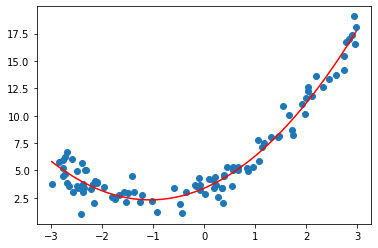

In [22]:
plt.scatter(x,y) 
X_ordenado=np.linspace(min(x),max(x)) 
plt.plot(X_ordenado,
         lin_reg.intercept_+
         lin_reg.coef_[0][0]*X_ordenado+
         lin_reg.coef_[0][1]*X_ordenado**2,color='red')   

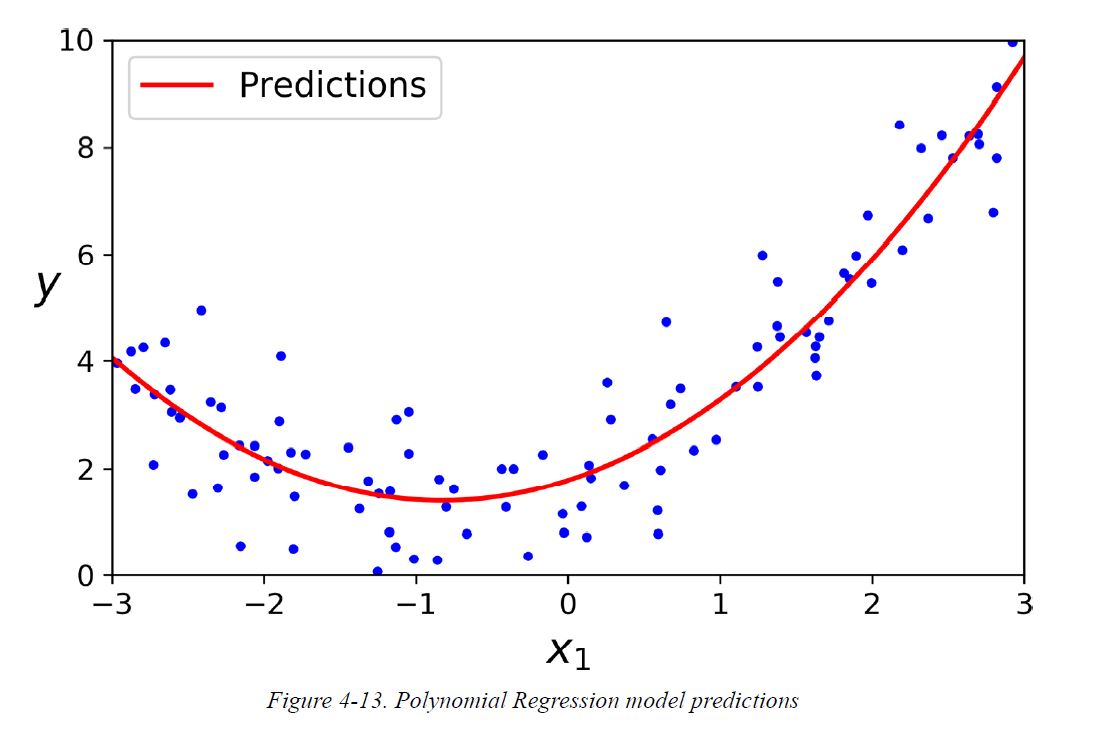

In [23]:
from IPython.display import Image 
Image('figure_4_13.JPG',width=600,height=300) 

Nada mal: el modelo estima $\hat{y} = 2.85+1.88x + 0.99x^{2} $ cuando en realidad la función original era $y = 3 + 2*x + 1*x^{2} + $ ruido gausiano. 

Tenga en cuenta que cuando hay múltiples características, la *Regresión polinomial* es capaz de encontrar relaciones entre características (que es algo que un modelo de *Regresión lineal simple* no puede hacer).

Esto es posible gracias al hecho de que ``PolynomialFeatures`` también agrega todas las combinaciones de características hasta el grado dado.

Por ejemplo, si hubiera dos características $a$ y $b$, ``PolynomialFeatures`` con ``grado = 3`` no solo agregaría las características $a^{2}$, $a^{3}$, $b^{2}$ y $b^{3}$, sino también las combinaciones $ab$, $a^{2}b$ y $ab^{2}$.

## ADVERTENCIA

``PolynomialFeatures(grado = d)`` transforma una matriz que contiene $n$ características en una matriz que contiene características $\frac{(n + d)!}{d! n!}$, donde n! es el factorial de $n$, es decir, $n! = 1 \times 2 \times 3 \times \cdots \times n.$   

¡Cuidado con la explosión combinatoria del número de funciones!

## Curvas de aprendizaje

Si realiza una regresión polinomial de alto grado, es probable que ajuste los datos de entrenamiento mucho mejor que con la regresión lineal simple.

Por ejemplo, la Figura 4-14 aplica un modelo polinomial de 300 grados a los datos de entrenamiento anteriores y compara el resultado con un modelo lineal puro y un modelo cuadrático (polinomio de segundo grado).

Observe cómo el modelo polinomial de 300 grados se mueve para acercarse lo más posible a las instancias de entrenamiento.

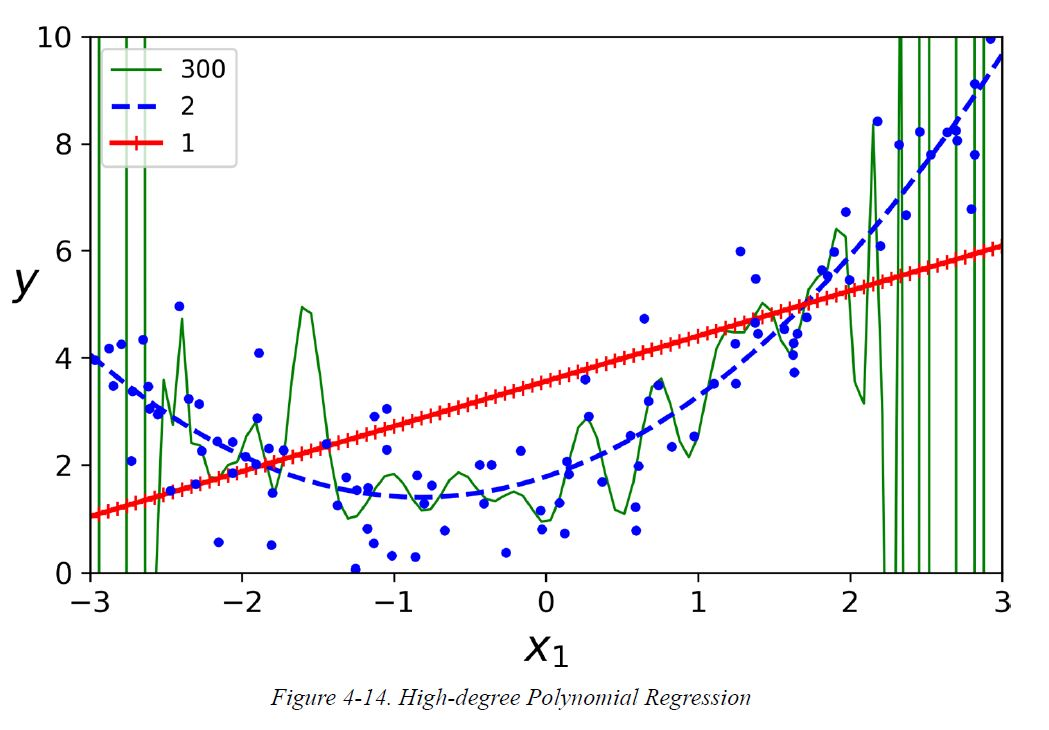

In [24]:
from IPython.display import Image
Image('figure_4_14.JPG',width=600,height=300)

Este modelo de regresión polinomial de alto grado sobreajusta severamente los datos de entrenamiento, mientras que el modelo lineal lo está desajustando.

El modelo que se generalizará mejor en este caso es el modelo cuadrático, lo cual tiene sentido porque los datos se generaron utilizando un modelo cuadrático.

Pero, en general, no sabrá qué función generó los datos, entonces,   
* ¿cómo puede decidir qué tan complejo debe ser su modelo?  
* ¿cómo puede saber si su modelo está sobreajustando o desajustando los datos?

En el Capítulo 2 usó la validación cruzada para obtener una estimación del rendimiento de generalización de un modelo.

Si un modelo tiene un buen rendimiento en los datos de entrenamiento, pero se generaliza mal según las métricas de validación cruzada, entonces su modelo está sobreajustado.

Si funciona mal en ambos, entonces no está bien. Ésta es una forma de saber cuándo un modelo es demasiado simple o demasiado complejo.

Otra forma de saberlo es mirar las **curvas de aprendizaje:** estas son gráficas del rendimiento del modelo en el conjunto de entrenamiento y el conjunto de validación en función del tamaño del conjunto de entrenamiento (o la iteración de entrenamiento).

Para generar los gráficos, entrene el modelo varias veces en subconjuntos de diferentes tamaños del conjunto de entrenamiento.

El siguiente código define una función que, dados algunos datos de entrenamiento, traza las curvas de aprendizaje de un modelo:

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2) 
    # Ojo, se esta tomando el conjunto de instancias X no a X_poli.  
    train_errors, val_errors = [], [] 
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.axis([0,80,0,5])   
    plt.legend() 

Veamos las curvas de aprendizaje del modelo de *regresión lineal simple* (una línea recta; consulte la Figura 4-15):

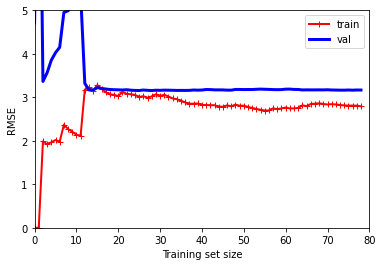

In [37]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y) 

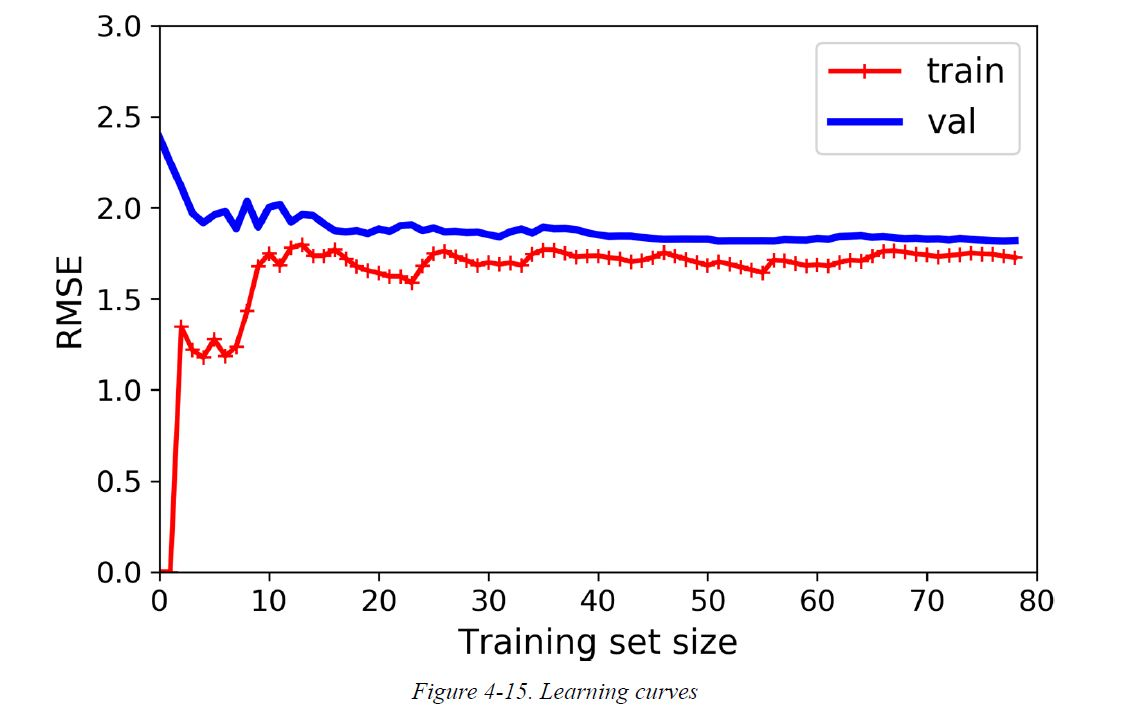

In [27]:
from IPython.display import Image
Image('figure_4_15.JPG',width=600,height=300) 

Este modelo que no encaja merece un poco de explicación.

En primer lugar, observemos el rendimiento de los datos de entrenamiento (color rojo):   

cuando hay solo una o dos instancias en el conjunto de entrenamiento, el modelo puede ajustarse a ellas perfectamente, por lo que la curva comienza en cero.

Pero a medida que se agregan nuevas instancias al conjunto de entrenamiento, es imposible que el modelo se ajuste perfectamente a los datos de entrenamiento, tanto porque los datos son ruidosos como porque no son lineales en absoluto.

Entonces, el error en los datos de entrenamiento aumenta hasta que alcanza una meseta, momento en el que agregar nuevas instancias al conjunto de entrenamiento no hace que el error promedio sea mucho mejor o peor.

Ahora veamos el rendimiento del modelo en los datos de validación (color azul). 

Cuando el modelo se entrena en muy pocas instancias de entrenamiento, es incapaz de generalizar correctamente, por lo que el error de validación es inicialmente bastante grande.

Luego, a medida que se muestran más ejemplos de entrenamiento, el modelo aprende y, por lo tanto, el error de validación disminuye lentamente.

Sin embargo, una vez más, una línea recta no puede hacer un buen trabajo modelando los datos, por lo que el error termina en una meseta, muy cerca de la otra curva.

Estas curvas de aprendizaje son típicas de un modelo que no se adapta bien. Ambas curvas han alcanzado una meseta; están cerca y bastante altos.

## Sugerencias 

Si su modelo no se ajusta a los datos de entrenamiento, agregar más ejemplos de entrenamiento no ayudará.

Necesita utilizar un modelo más complejo o crear mejores funciones.

Ahora veamos las curvas de aprendizaje de un modelo polinomial de décimo grado sobre los mismos datos (Figura 4-16):

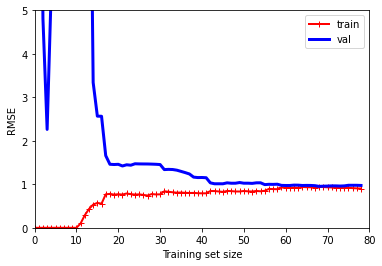

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
('scaler',StandardScaler()),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, x, y) 

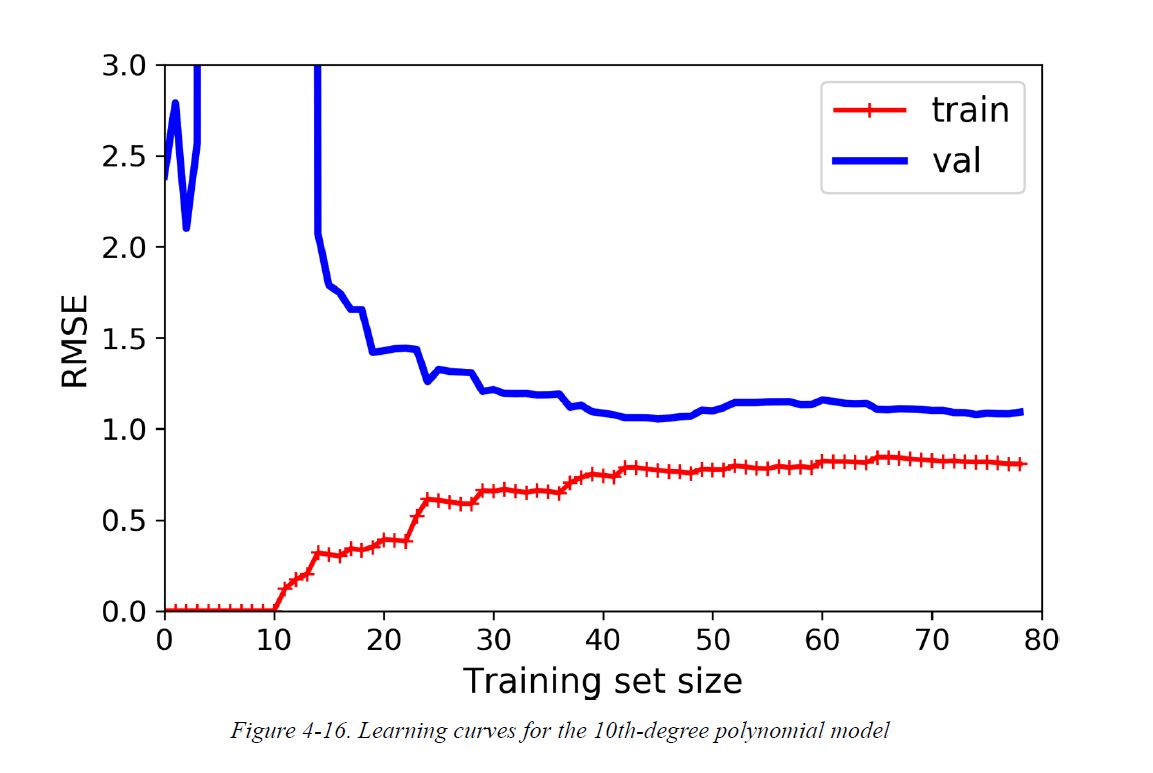

In [40]:
from IPython.display import Image 
Image('figure_4_16.JPG',width=600,height=300) 

Estas curvas de aprendizaje se parecen un poco a las anteriores, pero hay dos muy
diferencias importantes:

* El error en los datos de entrenamiento es mucho menor que con el modelo de regresión lineal.  
* Hay un espacio entre las curvas. Esto significa que el modelo funciona significativamente mejor en
  los datos de entrenamiento que en los datos de validación, que es el sello distintivo de un modelo   
  de sobreajuste.

Sin embargo, si usaras un conjunto de entrenamiento mucho más grande, las dos curvas seguirían acercándose.

## TIP  

Una forma de mejorar un modelo de sobreajuste es alimentarlo con más datos de entrenamiento hasta que el error de validación alcance el error de entrenamiento.

## La compensación sesgo/varianza

Un resultado teórico importante de la estadística y el aprendizaje automático es el hecho de que el error de generalización de un modelo se puede expresar como la suma de tres errores muy diferentes:

### Bias (Parcialidad o sesgo) 

Esta parte del error de generalización se debe a suposiciones erróneas, como suponer que los datos son lineales cuando en realidad son cuadráticos.

Es más probable que un modelo de alto sesgo no se ajuste a los datos de entrenamiento.

### Variance

Esta parte se debe a la excesiva sensibilidad del modelo a pequeñas variaciones en los datos de entrenamiento.

Es probable que un modelo con muchos grados de libertad (como un modelo polinomial de alto grado) tenga una alta varianza y, por lo tanto, se ajuste a los datos de entrenamiento.

### Irreducible error

Esta parte se debe al ruido de los datos en sí.

La única forma de reducir esta parte del error es limpiar los datos (por ejemplo, arreglar las fuentes de datos, como sensores rotos, o detectar y eliminar valores atípicos).

El aumento de la complejidad de un modelo generalmente aumentará su varianza y reducirá su sesgo.   

Por el contrario, reducir la complejidad de un modelo aumenta su sesgo y reduce su varianza.

Por eso se llama compensación.

## Modelos lineales regularizados
Página 193 Aurelien Geron.  

Como vimos en los capítulos 1 y 2, una buena manera de reducir el sobreajuste es regularizar el modelo (es decir, restringirlo): cuantos menos grados de libertad tenga, más difícil será para él sobreajustar los datos.

Una forma sencilla de regularizar un modelo polinomial es reducir el número de grados polinomiales.

Para un modelo lineal, la regularización se logra típicamente restringiendo los pesos del modelo.

Ahora veremos:  
* Regresión de cresta,  
* Regresión de lazo y   
* Red elástica,    

que implementan tres formas diferentes de restringir los pesos.

## Ridge Regression

Ridge Regression (también llamada regularización de Tikhonov) es una versión regularizada de Linear Regression: se agrega un término de regularización igual a   

$$ \alpha\sum_{i = 1}^{n} \theta_{i}^{2} $$  

a la función de costo.

Esto obliga al algoritmo de aprendizaje no solo a ajustar los datos, sino también a mantener los pesos del modelo lo más pequeños posible.

Tenga en cuenta que el término de regularización solo debe agregarse a la función de costos durante la capacitación.

Una vez entrenado el modelo, desea utilizar la medida de rendimiento no regularizada para evaluar el
rendimiento del modelo.

## NOTE

Es bastante común que la función de costo utilizada durante la capacitación sea diferente de la medida de rendimiento utilizada para las pruebas.

Aparte de la regularización, otra razón por la que podrían ser diferentes es que una buena función de coste de formación debería tener derivados favorables a la optimización, mientras que la medida de rendimiento utilizada para las pruebas debería ser lo más cercana posible al objetivo final.

Por ejemplo, los clasificadores a menudo se entrenan usando una función de costo como la pérdida de registros (discutida en un momento) pero se evalúan usando precisión/recuperación.

El hiperparámetro $\alpha$ controla cuánto desea regularizar el modelo.

Si $\alpha = 0$, entonces la regresión de cresta es simplemente una regresión lineal.

Si $\alpha$ es muy grande, entonces todos los pesos terminan muy cerca de cero y el resultado es una línea plana que atraviesa la media de los datos.

La ecuación 4-8 presenta la función de costo de regresión de crestas.

Ecuación 4-8. Función de costo de regresión de cresta 
$$ J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + \alpha \frac{1}{2}\sum_{i=1}^{n}\theta_{i}^{2} $$

Tenga en cuenta que el término de sesgo $\theta_{0}$ no está regularizado (la suma comienza en $i = 1$, no en $0$).

Si definimos $\mathbf{w}$ como el vector de pesos de características ($\theta_{0}$ a $\theta_{n}$), entonces el término de regularización es igual a $1/2(|| \mathbf{w} ||_{2} )^{2}$, donde $|| \mathbf{w} ||_{2}$ representa la norma $\mathcal{l}_{2}$ del vector de pesos.

Para Gradient Descent, simplemente agregue $\alpha \mathbf{w}$ al vector de gradiente MSE (Ecuación 4-6).

## ADVERTENCIA

Es importante escalar los datos (por ejemplo, usando un Escalador estándar) antes de realizar la regresión de crestas, ya que es sensible a la escala de las características de entrada.

Esto es cierto para la mayoría de los modelos regularizados.

La figura 4-17 muestra varios modelos de Ridge entrenados en algunos datos lineales usando diferentes valores de $\alpha$.

A la izquierda, se utilizan modelos sencillos de Ridge, lo que conduce a predicciones lineales.

A la derecha, los datos primero se expanden usando PolynomialFeatures (grado = 10), luego se escalan usando un StandardScaler, y finalmente los modelos Ridge se aplican a las características resultantes: esto es Regresión polinomial con regularización de crestas.

Observe cómo aumentar $\alpha$ conduce a predicciones más planas (es decir, menos extremas, más razonables), lo que reduce la varianza del modelo pero aumenta su sesgo.

In [ ]:
from IPython.display import Image 
Image('figure_4_17.JPG',width=600,height=300) 

Al igual que con la regresión lineal, podemos realizar la regresión de crestas calculando una ecuación de forma cerrada o realizando un gradiente descendente.

Los pros y los contras son los mismos. La ecuación 4-9 muestra la solución de forma cerrada, donde $A$ es la matriz de identidad de $(n + 1) \times (n + 1)$, excepto con un $0$ en la celda superior izquierda, correspondiente al término de sesgo.

Ecuación 4-9. Solución de forma cerrada Ridge Regression

$$ \hat{\mathbf{\theta}} =  (\mathbf{X}^{T}\mathbf{X} + \alpha \mathbf{A})^{-1}\mathbf{X}^{T}\mathbf{y} $$

A continuación se explica cómo realizar la regresión de crestas con Scikit-Learn utilizando una solución de forma cerrada (una variante de la ecuación 4-9 que utiliza una técnica de factorización matricial de André-Louis Cholesky):

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

And using Stochastic Gradient Descent: 

Y usando el Gradiente Descendente Estocástico:

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

El hiperparámetro de ``penalty`` establece el tipo de término de regularización que se utilizará.

Especificar ``"l2"`` indica que desea que SGD agregue un término de regularización a la función de costo igual a la mitad del cuadrado de la norma $\mathcal{l}_{2}$ del vector de peso: esto es simplemente Ridge Regression.

## Lasso Regression  

La regresión del operador de selección y contracción mínima absoluta (generalmente llamada simplemente Regresión de lazo) es otra versión regularizada de la regresión lineal:

al igual que Ridge Regression, agrega un término de regularización a la función de costo, pero usa la norma $\mathcal{l}_{1}$ del vector de peso en lugar de la mitad del cuadrado de la norma $\mathcal{l}_{2}$ (ver Ecuación 4-10).

Ecuación 4-10. Función de costo de regresión de lazo

$$ J(\theta) = MSE(\theta) + \alpha\sum_{i = 1}^{n} |\theta_{i}| $$

La Figura 4-18 muestra lo mismo que la Figura 4-17 pero reemplaza los modelos Ridge con modelos Lasso y usa valores $\alpha$ más pequeños.

In [ ]:
from IPython.display import Image
Image('figure_4_18.jpg',width=600,height=300) 

Una característica importante de la regresión de lazo es que tiende a eliminar las ponderaciones de las características menos importantes (es decir, establecerlas en cero).

Por ejemplo, la línea punteada en el gráfico de la derecha en la Figura 4-18 (con $\alpha = 10^{-7}$) parece cuadrática, casi lineal: todos los pesos de las características polinomiales de alto grado son iguales a cero.

En otras palabras, Lasso Regression realiza automáticamente la selección de características y genera un *sparse model* (es decir, con pocas ponderaciones de características distintas de cero).

Puede tener una idea de por qué este es el caso observando la Figura 4-19: los ejes representan dos parámetros del modelo y los contornos de fondo representan diferentes funciones de pérdida.

En la gráfica superior izquierda, los contornos representan la pérdida de $\mathcal{l}_{1}$ ($|\theta_{1}| + \theta_{2}|$), que cae linealmente a medida que se acerca a cualquier eje.

Por ejemplo, si inicializa los parámetros del modelo en $\theta_{1} = 2$ y $\theta_{2} = 0.5$, ejecutar Gradient Descent disminuirá ambos parámetros por igual (como se representa con la línea amarilla discontinua); por lo tanto, $\theta_{2}$ llegará a 0 primero (ya que estaba más cerca de 0 al principio).

Después de eso, Gradient Descent se deslizará por el canalón hasta llegar a $\theta_{1} = 0$ (con un poco de rebotando, ya que los gradientes de $\mathcal{l}_{1}$ nunca se acercan a 0: son $–1$ o $1$ para cada parámetro).

En la gráfica superior derecha, los contornos representan la función de costo de Lasso (es decir, una función de costo de MSE más una pérdida de $\mathcal{l}_{1}$).

Los pequeños círculos blancos muestran la ruta que toma Gradient Descent para optimizar algunos parámetros del modelo que se inicializaron alrededor de $\theta_{1} = 0.25$ y $\theta_{2} = –1$: observe una vez más cómo la ruta llega rápidamente a $\theta_{2} = 0$, luego rueda hacia abajo y termina rebotando alrededor del óptimo global (representado por el cuadrado rojo).

Si aumentamos $\alpha$, el óptimo global se movería a la izquierda a lo largo de la línea amarilla discontinua, mientras que si disminuimos $\alpha$, el óptimo global se movería a la derecha (en este ejemplo, los parámetros óptimos para el MSE no regularizado son $\theta_{1} = 2$ y $\theta_{2} = 0.5$).

In [ ]:
from IPython.display import Image
Image('figure_4_19.jpg',width=600,height=300) 

Los dos gráficos inferiores muestran lo mismo pero con una penalización $\mathcal{l}_{2}$ en su lugar.

En el gráfico inferior izquierdo, puede ver que la pérdida de $\mathcal{l}_{2}$ disminuye con la distancia al origen, por lo que Gradient Descent solo toma un camino recto hacia ese punto.

En la gráfica inferior derecha, los contornos representan la función de costo de la regresión de crestas (es decir, una función de costo de MSE más una pérdida de $\mathcal{l}_{2}$).

Hay dos diferencias principales con Lasso.

Primero, los gradientes se vuelven más pequeños a medida que los parámetros se acercan al óptimo global, por lo que Gradient Descent se ralentiza naturalmente, lo que ayuda a la convergencia (ya que no hay rebotes).

En segundo lugar, los parámetros óptimos (representados por el cuadrado rojo) se acercan cada vez más al origen cuando aumenta $\alpha$, pero nunca se eliminan por completo.

## TIP  

Para evitar que Gradient Descent rebote alrededor del óptimo al final cuando use Lasso, debe reducir gradualmente la tasa de aprendizaje durante el entrenamiento (aún rebotará alrededor del óptimo, pero los pasos serán cada vez más pequeños, por lo que convergerá).

La función de costo de Lasso no es diferenciable en $\theta_{i} = 0$ (para $i = 1, 2, \ldots, n$), pero Gradient Descent aún funciona bien si usa un vector de subgradiente $\mathbf{g}$ en su lugar cuando cualquier $\theta_{i} = 0$.

La ecuación 4-11 muestra una ecuación vectorial de subgradiente que puede usar para Gradient Descent con la función de costo Lasso.

Ecuación 4-11. Vector de subgrado de regresión de lazo

$$ g(\theta,J) = \nabla_{\mathbf{\theta}} MSE(\mathbf{\theta}) + \alpha \begin{pmatrix} sign(\theta_{1}) \\ sign(\theta_{2}) \\ \vdots \\ sign(\theta_{n})  \end{pmatrix}  \quad \text{Donde} \quad sign(\theta_{i}) \begin{cases} -1 & \text{si } \theta_{i} < 0 \\ 
0 & \text{si } \theta_{i} = 0 \\
1 & \text{si } \theta_{i} > 0 
\end{cases} $$

Aquí hay un pequeño ejemplo de Scikit-Learn usando la clase Lasso:

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

Tenga en cuenta que, en su lugar, puede utilizar ``SGDRegressor (penalización = "l1")``

## Elastic Net  

Elastic Net es un término medio entre Ridge Regression y Lasso Regression.

The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio $r$.  

When $r = 0$, Elastic Net is equivalent to Ridge Regression, and when $r = 1$, it is equivalent to Lasso Regression (see Equation 4-12).

Equation 4-12. Elastic Net cost function

$$ J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^{n} |\theta_{i}| + \frac{1-r}{2}\alpha\sum_{i = 1}^{n} \theta_{i}^{2} $$

So when should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression.   

Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net because they tend to reduce the useless features weights down to zero, as we have discussed.   

In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

Here is a short example that uses Scikit-Learn’s ``ElasticNet`` (``l1_ratio`` corresponds to the mix ratio $r$):

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

## Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum.

This is called early stopping. Figure 4-20 shows a complex model (in this case, a high-degree Polynomial Regression model) being trained with Batch Gradient Descent.  

As the epochs go by the algorithm learns, and its prediction error (RMSE) on the training set goes down, along with its prediction error on the validation set.   

After a while though, the validation error stops decreasing and starts to go back up.   

This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum.   

It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch.”

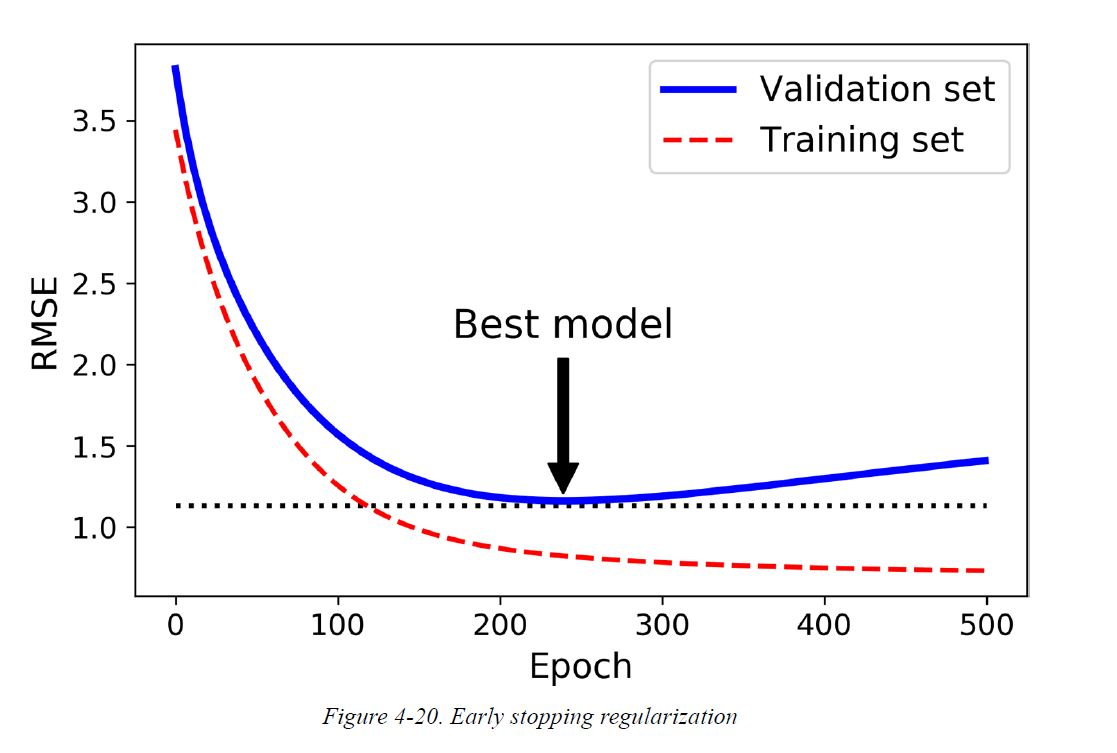

In [1]:
from IPython.display import Image
Image('figure_4_20.jpg',width=600,height=300) 


## TIP

With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not.   

One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.

Here is a basic implementation of early stopping:

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
# prepare the data
poly_scaler = Pipeline([
("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)  # aquí es donde se está llamandoa X_train 
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

Note that with warm_start=True, when the fit() method is called it continues training where it left off, instead of restarting from scratch.

## Logistic Regression

As we discussed in Chapter 1, some regression algorithms can be used for classification (and vice versa).   

Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?).  

If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

### Estimating Probabilities

So how does Logistic Regression work? Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result (see Equation 4-13).  

Equation 4-13. Logistic Regression model estimated probability (vectorized form)

$$\hat{p} = h_{\mathbf{\theta}}(x) = \sigma(\mathbf{x}^{T}\mathbf{\theta}) $$

The logistic—noted $\sigma(\cdot)$ — is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1. It is defined as shown in Equation 4-14 and Figure 4-

$$ \sigma(t) = \frac{1}{1+exp(-t)} $$

In [ ]:
from IPython.display import Image 
Image('figure_4_21.JPG',width=600,height=300)

Once the Logistic Regression model has estimated the probability $\hat{p}= h_{\theta}(\mathbf{x})$ that an instance $\mathbf{x}$ belongs to the positive class, it can make its prediction $\hat{y}$ easily (see Equation 4-15).

Equation 4-15. Logistic Regression model prediction

$$ \hat{y} = \begin{cases}0 & \text{si } \hat{p} < 0.5 \\ 1 & \text{si } \hat{p} \geq 0.5 \end{cases} $$

Notice that $\sigma(t) < 0.5$ when $t < 0$, and $\sigma(t) \geq 0.5$ when $t \geq 0$, so a Logistic
Regression model predicts 1 if $\mathbf{x}^{T}\mathbf{\theta}$ is positive and $0$ if it is negative.

## NOTE 

The score $t$ is often called the *logit*.  

The name comes from the fact that the logit function, defined as $logit(p) = log(p / (1 – p))$, is the inverse of the logistic function.   

Indeed, if you compute the logit of the estimated probability $p$, you will find that the result is $t$. 

The logit is also called the log-odds, since it is the log of the ratio between the estimated probability for the positive class and the estimated probability for the negative class.  

## Función de entrenamiento y coste

Now you know how a Logistic Regression model estimates probabilities and makes predictions. But how is it trained?   

The objective of training is to set the parameter vector $\mathbf{\theta}$ so that the model estimates high probabilities for positive instances $(y = 1)$ and low probabilities for negative instances $(y = 0)$.   

This idea is captured by the cost function shown in Equation 4-16 for a single training
instance $x$.

Equation 4-16. Cost function of a single training instance

$$ c(\mathbf{\theta}) = \begin{cases}-\log(\hat{p}) & \text{si } y = 1 \\ 
-\log(1-\hat{p}) & \text{si } y = 0 
\end{cases} $$

This cost function makes sense because $–\log(t)$ grows very large when $t$ approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance.   

On the other hand, $–\log(t)$ is close to 0 when $t$ is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.

The cost function over the whole training set is the average cost over all training instances.   

It can be written in a single expression called the log loss, shown in Equation 4-17.

Equation 4-17. Logistic Regression cost function (log loss)

$$ J(\mathbf{\theta}) = -\frac{1}{m}\sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{p}^{(i)}) + (1-y^{(i)}\log(1-\hat{p}^{(i)})) \right] $$

The bad news is that there is no known closed-form equation to compute the value of θ that minimizes this cost function (there is no equivalent of the Normal Equation).   

The good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough).   

The partial derivatives of the cost function with regard to the j model parameter $\theta$ are given by Equation 4-18.

Equation 4-18. Logistic cost function partial derivatives

$$ \frac{\partial}{\partial \theta_{j}} J(\theta) = \frac{1}{m}\sum_{i = 1}^{m} \left( \sigma \left(\theta^{T}x^{(i)} \right) - y^{(i)} \right)x_{j}^{(i)} $$

This equation looks very much like Equation 4-5: for each instance it computes the prediction error and multiplies it by the j feature value, and then it computes the average over all training instances.   

Once you have the gradient vector containing all the partial derivatives, you can use it in the Batch Gradient Descent algorithm.  

That’s it: you now know how to train a Logistic Regression model. For Stochastic GD you would take one instance at a time, and for Minibatch GD you would use a mini-batch at a time.

Decision Boundaries

Let’s use the iris dataset to illustrate Logistic Regression.  

This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of
three different species: Iris setosa, Iris versicolor, and Iris virginica (see Figure 4-22).

In [ ]:
from IPython.display import Image 
Image('figure_4_22.jpg',width=600,height=300)

Let’s try to build a classifier to detect the Iris virginica type based only on the
petal width feature. First let’s load the data:

In [ ]:
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> list(iris.keys())


In [ ]:
>>> X = iris["data"][:, 3:] # petal width
>>> y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

Now let’s train a Logistic Regression model:

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

Let’s look at the model’s estimated probabilities for flowers with petal widths
varying from 0 cm to 3 cm (Figure 4-23):

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
# + more Matplotlib code to make the image look pretty

In [ ]:
from IPython.display import Image 
Image('figure_4_23.JPG',width=600,height=300) 

The petal width of Iris virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm.   

Notice that there is a bit of overlap.  

Above about 2 cm the classifier is highly confident that the flower is an Iris virginica (it outputs a high probability for that class), while below 1 cm it is highly confident that it is not an Iris virginica (high probability for the “Not Iris virginica” class).   

In between these extremes, the classifier is unsure.  

However, if you ask it to predict the class (using the predict() method rather than the predict_proba() method), it will return whichever class is the most likely.   

Therefore, there is a decision boundary at around 1.6 cm where both 15 probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris virginica, and otherwise it will predict that it is not (even if it is not very confident):

In [ ]:
log_reg.predict([[1.7], [1.5]]) 

Figure 4-24 shows the same dataset, but this time displaying two features: petal width and length.  

Once trained, the Logistic Regression classifier can, based on these two features, estimate the probability that a new flower is an Iris virginica.  

The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary.  

Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right).  

All the flowers beyond the top-right line have an over 90% chance of being Iris virginica,
according to the model.

In [ ]:
from IPython.display import Image 
Image('figure_4_24.JPG',width=600,height=300) 


Just like the other linear models, Logistic Regression models can be regularized using $\mathcal{l}$ or $\mathcal{l}$ penalties.  

Scikit-Learn actually adds an $\mathcal{l}$ penalty by default.

NOTE

The hyperparameter controlling the regularization strength of a Scikit-Learn
LogisticRegression model is not alpha (as in other linear models), but its inverse: C.  

The higher the value of C, the less the model is regularized. 16 1 2 2

## Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers (as discussed in Chapter 3).  

This is called Softmax Regression, or Multinomial Logistic Regression.

The idea is simple: when given an instance $x$, the Softmax Regression model first computes a score $s_{k}(x)$ for each class $k$, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores.  

The equation to compute $s_{k}(x)$ should look familiar, as it is just like the equation for Linear Regression prediction (see Equation 4- 19).

Ecuación 4-19. Puntaje softmax para la clase $k$

$$ s_{k}(x) = x^{T}\theta^{(k)} $$

Note that each class has its own dedicated parameter vector $\mathbf{\theta}^{(k)}$.   

All these vectors are typically stored as rows in a parameter matrix $\mathbf{\Theta}$.

Once you have computed the score of every class for the instance x, you can estimate the probability $\hat{p}_{k}$ that the instance belongs to class k by running the scores through the softmax function (Equation 4-20).   

The function computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials).  

The scores are generally called logits or log-odds (although they are actually unnormalized log-odds).
Equation 4-20. Softmax function